In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.constants import c,pi,mu_0,epsilon_0

#The following hack is for importing a module from the "Modules" folder
import os
cwd = os.getcwd()
os.chdir('..')
from Modules.materials import *
from Modules.waveguides import *
os.chdir(cwd)

In [2]:
who

asymmetric_slab_eqs	 beta_f	 brentq	 c	 cwd	 epsilon_0	 mu_0	 neff_asymmetric_slab	 neff_ridge	 
neff_symmetric_slab	 np	 number_of_modes	 os	 pi	 plt	 refractive_index	 sellmeier	 singlemode_asymmetric	 
singlemode_symmetric	 symmetric_slab_equations	 time	 


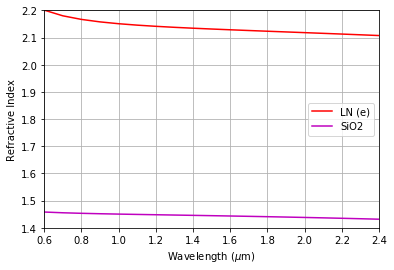

In [3]:
wl = np.arange(0.5,2.5,0.1)

nLN = refractive_index('LN_MgO_e', wl)
nSiO2 = refractive_index('SiO2', wl)
dslab = 0.45
dridge = 0.7
wridge = 1.5

neff = np.zeros(wl.shape)
for kw in range(wl.size):
    neff[kw] = neff_ridge(wl[kw], nridge=nLN[kw], nbox=nSiO2[kw], w=wridge, h=dridge, hslab=dslab, mode='TE')
    
plt.plot(wl, nLN, 'r', label='LN (e)');
plt.plot(wl, nSiO2, 'm', label='SiO2');
plt.grid();
plt.legend();
plt.xlabel('Wavelength ($\mu$m)');
plt.ylabel('Refractive Index');
plt.axis([0.6,2.4,1.4,2.2]);

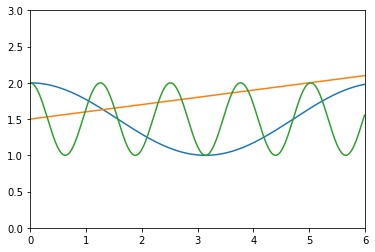

In [10]:
#Length
L = 6
dz = 0.01
z = np.arange(0,L,dz)

w_z = 0.5*np.cos(z) + 1.5

plt.plot(z,w_z)
plt.axis([0,L,0,3]);

w_z = 0.1*z + 1.5

plt.plot(z,w_z)
plt.axis([0,L,0,3]);

w_z = 0.5*np.cos(5*z) + 1.5

plt.plot(z,w_z)
plt.axis([0,L,0,3]);

In [5]:
# kw = 5
# neff_z = np.zeros(z.shape)
# for kz in range(z.size):
#     neff_z[kz] = neff_ridge(wl[kw], nridge=nLN[kw], nbox=nSiO2[kw], w=w_z[kz], h=dridge, hslab=dslab, mode='TE')

# plt.plot(z, neff_z)
# print(np.sum(neff_z*dz)/L)

# kw = 15
# neff_z = np.zeros(z.shape)
# for kz in range(z.size):
#     neff_z[kz] = neff_ridge(wl[kw], nridge=nLN[kw], nbox=nSiO2[kw], w=w_z[kz], h=dridge, hslab=dslab, mode='TE')

# plt.plot(z, neff_z);

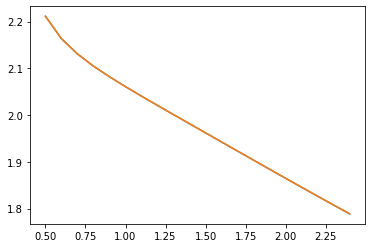

In [11]:
w_z = 0.5*np.cos(z) + 1.5
neff = np.zeros(wl.shape)
for kw in range(wl.size):
    neff_z = np.zeros(z.shape)
    for kz in range(z.size):
        neff_z[kz] = neff_ridge(wl[kw], nridge=nLN[kw], nbox=nSiO2[kw], w=w_z[kz], h=dridge, hslab=dslab, mode='TE')
    neff[kw] = np.sum(neff_z*dz)/L

plt.plot(wl,neff)

# w_z = 0.1*z + 1.5
# neff = np.zeros(wl.shape)
# for kw in range(wl.size):
#     neff_z = np.zeros(z.shape)
#     for kz in range(z.size):
#         neff_z[kz] = neff_ridge(wl[kw], nridge=nLN[kw], nbox=nSiO2[kw], w=w_z[kz], h=dridge, hslab=dslab, mode='TE')
#     neff[kw] = np.sum(neff_z*dz)/L

# plt.plot(wl,neff)

w_z = 0.5*np.cos(5*z) + 1.5
neff = np.zeros(wl.shape)
for kw in range(wl.size):
    neff_z = np.zeros(z.shape)
    for kz in range(z.size):
        neff_z[kz] = neff_ridge(wl[kw], nridge=nLN[kw], nbox=nSiO2[kw], w=w_z[kz], h=dridge, hslab=dslab, mode='TE')
    neff[kw] = np.sum(neff_z*dz)/L

plt.plot(wl,neff)